In [2]:
import os
import numpy as np
import pandas as pd
import json
os.environ["NAMESPACE"]="research"
os.environ["PROFILE"]="local"
from agrobrain_util.runtime.evironment import RuntimeEnv
from agrobrain_util.infra.app_config import application_config as cfg

import shutil
import glob
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import random
import glob
import datetime
from tqdm import tqdm
from datetime import datetime

from PIL import Image

import dtlpy as dl
if dl.token_expired():
    dl.login()



env = RuntimeEnv()
categories_dict = cfg['tags']['categories']

DATA_DIR = "data"


def create_cat_dict(cat_list):
    cat_dict_types = {}
    cat_dict_names = {}
    for l in cat_list:
        cat_dict_types[l['id']] = l['type']
        if 'name' in l:
            cat_dict_names[l['id']] = l['name']
        else:
            cat_dict_names[l['id']] = 'NoName'
    cat_dict_types[0] = None
    cat_dict_names[0] = None
    return cat_dict_types, cat_dict_names


categories_hierarchy = env.eti_api.get_categories_hierarchy()
cat_dict_types, cat_dict_names = create_cat_dict(categories_hierarchy[9]['subCategories'])



could not find stamp in environment variables
could not find stamp in environment variables
could not find KUBEFLOW_API_BASIC_AUTH_TOKEN in environment variables
could not find AI_RABBITMQ_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING in environment variables
could not find TARANIS_DB_CONNECTION_STRING in environment variables
could not find GLOBAL_DB_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING_NEW in environment variables


In [18]:
# DISPLAY TEAM TAGGING TASK

dataloop_local_data_dir = os.path.join(DATA_DIR, f"dataloop")
annotation_local_path = os.path.join(dataloop_local_data_dir, f"annotations_anafa_2023_07_06_wide_full_ttt_filtered_dataset_v1", "json")
# annotation_local_path = f'C:\\Users\\Anafa\\repositories\\agrobrain_wide_images_exploration\\data\\dataloop\\annotations_anafa_2023_07_06_wide_full_ttt_filtered_dataset_v1\\json'

jsons_paths_list = glob.glob(os.path.join(annotation_local_path, "*.json"))




In [22]:

im_id = int(os.path.basename(jsons_paths_list[0]).replace(".json", ""))

In [28]:
image_dataloop_df = pd.DataFrame(example_data['annotations'])
image_polygons = image_dataloop_df[image_dataloop_df['type']=='polygon'].reset_index()
image_points = image_dataloop_df[image_dataloop_df['type']=='point'].reset_index()
image_ellipse = image_dataloop_df[image_dataloop_df['type']=='ellipse'].reset_index()
image_segment = image_dataloop_df[image_dataloop_df['type']=='segment'].reset_index()

In [34]:
image_segment['coordinates'][0]

[[{'x': 728.8103245887312, 'y': 489.4656109883852},
  {'x': 724.2729840465445, 'y': 495.70445423389185},
  {'x': 724.2729840465445, 'y': 505.34630288603853},
  {'x': 725.9744867498646, 'y': 508.18214072490514},
  {'x': 728.8103245887312, 'y': 510.4508109959985},
  {'x': 732.7804975631445, 'y': 512.1523136993185},
  {'x': 748.6611894607978, 'y': 511.5851461315451},
  {'x': 750.9298597318912, 'y': 509.8836434282251},
  {'x': 755.4672002740778, 'y': 503.0776326149452},
  {'x': 759.4373732484911, 'y': 492.8686163950252},
  {'x': 759.4373732484911, 'y': 488.33127585283853},
  {'x': 753.1985300029844, 'y': 483.22676774287856},
  {'x': 745.2581840541578, 'y': 483.22676774287856},
  {'x': 736.1835029697845, 'y': 486.62977314951854},
  {'x': 728.8103245887312, 'y': 486.62977314951854}]]

In [46]:
image_segment['coordinates'][i][0]

[{'x': 728.8103245887312, 'y': 489.4656109883852},
 {'x': 724.2729840465445, 'y': 495.70445423389185},
 {'x': 724.2729840465445, 'y': 505.34630288603853},
 {'x': 725.9744867498646, 'y': 508.18214072490514},
 {'x': 728.8103245887312, 'y': 510.4508109959985},
 {'x': 732.7804975631445, 'y': 512.1523136993185},
 {'x': 748.6611894607978, 'y': 511.5851461315451},
 {'x': 750.9298597318912, 'y': 509.8836434282251},
 {'x': 755.4672002740778, 'y': 503.0776326149452},
 {'x': 759.4373732484911, 'y': 492.8686163950252},
 {'x': 759.4373732484911, 'y': 488.33127585283853},
 {'x': 753.1985300029844, 'y': 483.22676774287856},
 {'x': 745.2581840541578, 'y': 483.22676774287856},
 {'x': 736.1835029697845, 'y': 486.62977314951854},
 {'x': 728.8103245887312, 'y': 486.62977314951854}]

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSu

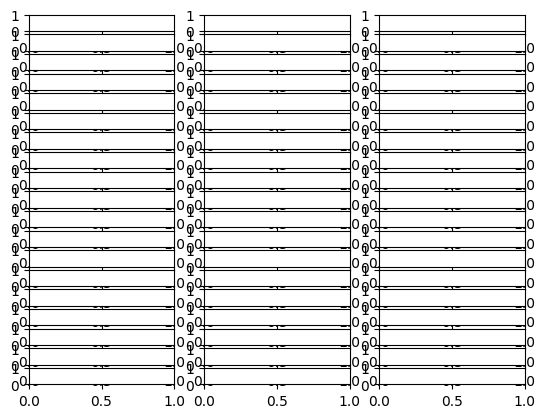

In [51]:
fig, axs = plt.subplots(num_rows, num_cols)
axs

In [80]:
# np.unique(image_dataloop_df['updatedBy'])
image_dataloop_df

,id,datasetId,itemId,url,item,dataset,srcAnnotation,type,label,attributes,coordinates,metadata,creator,createdAt,updatedBy,updatedAt,hash,source
0,6489c2a87e08ea7e4596859c,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,6484d55dec55430248c15de7,point,weed,[],"{'x': 1866.105315723968, 'y': 1167.23411996870...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",nir.naor@taranis.com,2023-06-14T13:37:44.222Z,nir.naor@taranis.com,2023-06-14T13:37:44.222Z,5a7efcfd4abe2f0da17b1714276864b41085763a,ui
1,6489c2a87e08ea490b96859e,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,6484d55dec554304fac15ddd,point,weed,[],"{'x': 1703.0912916152765, 'y': 570.13059241858...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",nir.naor@taranis.com,2023-06-14T13:37:44.295Z,nir.naor@taranis.com,2023-06-14T13:37:44.295Z,dc5f132d282246ef6d2814c28a79408249d706e7,ui
2,6489c2a87e08eac3389685a0,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,6484d55dec554305f1c15e14,segment,weed,[],"[[{'x': 3614.2281291656845, 'y': 2688.79159020...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",nir.naor@taranis.com,2023-06-14T13:37:44.354Z,nir.naor@taranis.com,2023-06-14T13:37:44.354Z,c261c17a7d52103b1a6bd28d9151201309d31638,ui
3,6489c2a87e08ea01639685a2,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,6484d55dec55430799c15df4,segment,weed,[],"[[{'x': 1437.4054573504925, 'y': 2558.78464080...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",nir.naor@taranis.com,2023-06-14T13:37:44.418Z,nir.naor@taranis.com,2023-06-14T13:37:44.418Z,39dd3d1c884fd2090ad6dbf7e7097eaf58feb87e,ui
4,6489c2a87e08ea54f99685a4,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,6484d55dec55430883c15df5,segment,weed,[],"[[{'x': 1665.264837824353, 'y': 2930.038033100...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",nir.naor@taranis.com,2023-06-14T13:37:44.481Z,nir.naor@taranis.com,2023-06-14T13:37:44.481Z,6aee508c5ee2d43517b88ccdc37e7464c7a8cef2,ui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6489c2b27e08ea6d9e9686f7,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,64881e9a99a6fbd4cf324413,segment,weed,[],"[[{'x': 1788.8976573814375, 'y': 2960.49049089...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",anafa.cohen@taranis.com,2023-06-14T13:37:54.358Z,anafa.cohen@taranis.com,2023-06-14T13:37:54.358Z,0789488541126ea626e72bc1495913590715ee92,ui
173,6489c2b27e08ea41809686f9,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/datasets/64804...,64881e9a99a6fbe80632441f,segment,weed,[],"[[{'x': 3220.64303003971, 'y': 2992.8111845961...","{'system': {'startTime': 0, 'endTime': 0, 'fra...",anafa.cohen@taranis.com,2023-06-14T13:37:54.409Z,anafa.cohen@taranis.com,2023-06-14T13:37:54.409Z,681c54440915cffc3bccda3ba43e5f5792412ba0,ui
174,6489c2b27e08ea81ce9686fb,64804de67c18923e26f9b641,64804de947bb012fb4d34423,https://gate.dataloop.ai/api/v1/annotations/64...,https://gate.dataloop.ai/api/v1/items/64804de9...,https://gate.dataloop.ai/api/v1/

: 

In [71]:
for js in jsons_paths_list:
    example_json_path = js

    with open(example_json_path) as file:
        example_data = json.load(file)



    image_dataloop_df = pd.DataFrame(example_data['annotations'])
    image_polygons = image_dataloop_df[image_dataloop_df['type']=='polyline'].reset_index()
    image_points = image_dataloop_df[image_dataloop_df['type']=='point'].reset_index()
    image_ellipse = image_dataloop_df[image_dataloop_df['type']=='ellipse'].reset_index()
    image_segment = image_dataloop_df[image_dataloop_df['type']=='segment'].reset_index()
    image_binary = image_dataloop_df[image_dataloop_df['type']=='binary'].reset_index()
    image_box = image_dataloop_df[image_dataloop_df['type']=='box'].reset_index()
    image_class = image_dataloop_df[image_dataloop_df['type']=='class'].reset_index()


    print(len(image_points))

1
1
4
1
244
53
36
143
15
28
49
1
163
158
502
111
76


/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/imageio_plugin.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return np.asarray(imageio_imread(*args, **kwargs))


TypeError: cannot unpack non-iterable int object

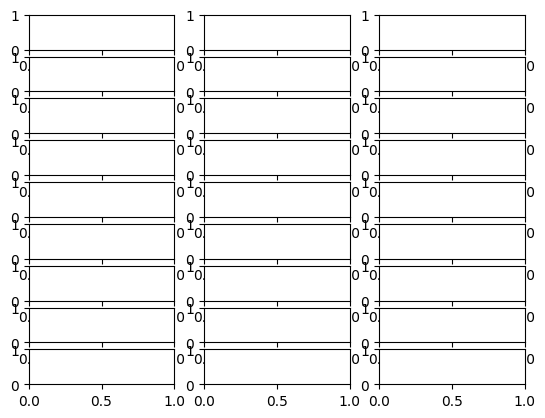

In [57]:
# DISPLAY ALL DL POLYGONS ON THE IMAGE

def get_im_id_from_json_path(p):
    return int(os.path.basename(p).replace(".json", ""))

example_json_path = jsons_paths_list[5]

with open(example_json_path) as file:
    example_data = json.load(file)



image_dataloop_df = pd.DataFrame(example_data['annotations'])
image_polygons = image_dataloop_df[image_dataloop_df['type']=='polygon'].reset_index()
image_points = image_dataloop_df[image_dataloop_df['type']=='point'].reset_index()
image_ellipse = image_dataloop_df[image_dataloop_df['type']=='ellipse'].reset_index()
image_segment = image_dataloop_df[image_dataloop_df['type']=='segment'].reset_index()

example_polygon_coordinates = example_data['annotations'][0]['coordinates']

example_image_id = get_im_id_from_json_path(example_json_path)
im_path = env.download_image(int(example_image_id))
image = io.imread(im_path)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

num_images = len(image_segment['coordinates'])
num_rows = (num_images + 2) // 3  # Divide and round up
num_cols = min(num_images, 3)

# Create the figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for i, ax in range(len(image_segment['coordinates'])):
    ax = axs[i]
    x_values = [coord['x'] for coord in image_segment['coordinates'][i][0]]
    y_values = [coord['y'] for coord in image_segment['coordinates'][i][0]]
    polygon = patches.Polygon(list(zip(x_values, y_values)), closed=True, fill=None, edgecolor='aquamarine')

    ax.imshow(image)
    # Add the polygon patch to the axes
    ax.add_patch(polygon)

    # Set the x and y limits of the axes
    ax.set_xlim(min(x_values)-100, max(x_values)+100)
    ax.set_ylim(min(y_values)-100, max(y_values)+100)

    ax.set_title(f"tag: {example_data['annotations'][i]['label']}")

fig.suptitle(f"Image ID: {example_image_id}", y=0.85)
fig.tight_layout(h_pad=20)
plt.show()



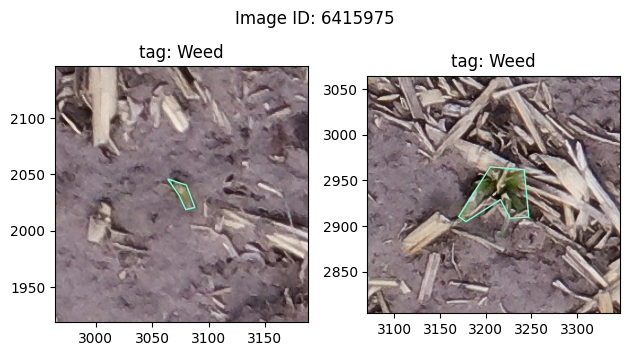

In [5]:
# DISPLAY ALL DL POLYGONS ON THE IMAGE

example_json_path = "data/dataloop_jsons/6415975.json"
with open(example_json_path) as file:
    example_data = json.load(file)

example_polygon_coordinates = example_data['annotations'][0]['coordinates']

example_image_id = 6415975
im_path = env.download_image(int(example_image_id))
image = io.imread(im_path)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

num_images = len(example_data['annotations'])
num_rows = (num_images + 2) // 3  # Divide and round up
num_cols = min(num_images, 3)

# Create the figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for i in range(len(example_data['annotations'])):
    ax = axs[i]
    x_values = [coord['x'] for coord in example_data['annotations'][i]['coordinates'][0]]
    y_values = [coord['y'] for coord in example_data['annotations'][i]['coordinates'][0]]
    polygon = patches.Polygon(list(zip(x_values, y_values)), closed=True, fill=None, edgecolor='aquamarine')

    ax.imshow(image)
    # Add the polygon patch to the axes
    ax.add_patch(polygon)

    # Set the x and y limits of the axes
    ax.set_xlim(min(x_values)-100, max(x_values)+100)
    ax.set_ylim(min(y_values)-100, max(y_values)+100)

    ax.set_title(f"tag: {example_data['annotations'][i]['label']}")

fig.suptitle(f"Image ID: {example_image_id}", y=0.85)
fig.tight_layout(h_pad=20)
plt.show()

In [ ]:
# task object or assignment instead of dataset. filter: completed.

In [3]:
# DOWNLOAD ANNOTATIONS FROM DATALOOP

DATASET_NAME = "anafa_2023_06_23_resolution_lim_dataset"
VERSION = 0

dataloop_local_data_dir = os.path.join(DATA_DIR, f"dataloop")
annotation_local_path = os.path.join(dataloop_local_data_dir, f"annotations_{DATASET_NAME}_v{VERSION}")
project = dl.projects.get(project_name='Taranis AI Annotation Projects')

task = project.tasks.get(task_name='anafa_2023_06_23_resolution_lim_first_task')
# task.


# dataset = project.datasets.get(dataset_name='anafa_2023_07_06_wide_full_ttt_filtered')
# # dataset.download(local_path=dataloop_local_data_dir,
# #                  annotation_options=dl.VIEW_ANNOTATION_OPTIONS_JSON)
# dataset.download_annotations(local_path=annotation_local_path)

In [6]:
assignments = task.assignments.list()

In [8]:
a = assignments[0]

In [ ]:
p = a.get_items()
p[0]

In [17]:
i = p[0][0]

In [32]:
l = i.annotations.list()

In [37]:
l.annotations[0].coordinates

[[{'x': 5184.0, 'y': 587.5},
  {'x': 5184.0, 'y': 0.0},
  {'x': 5184.0, 'y': 529.1666666666667}]]

In [7]:
# DOWNLOAD ANNOTATIONS FROM DATALOOP

DATASET_NAME = "anafa_2023_07_06_wide_full_ttt_filtered_dataset"
VERSION = 1

dataloop_local_data_dir = os.path.join(DATA_DIR, f"dataloop")
annotation_local_path = os.path.join(dataloop_local_data_dir, f"annotations_{DATASET_NAME}_v{VERSION}")
project = dl.projects.get(project_name='Taranis AI Annotation Projects')

dataset = project.datasets.get(dataset_name='anafa_2023_07_06_wide_full_ttt_filtered')
# dataset.download(local_path=dataloop_local_data_dir,
#                  annotation_options=dl.VIEW_ANNOTATION_OPTIONS_JSON)
dataset.download_annotations(local_path=annotation_local_path)

Download Items: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


'data/dataloop/annotations_anafa_2023_07_06_wide_full_ttt_filtered_dataset_v1'

In [30]:
# FILTER BEFORE DOWNLOADING

filters = dl.Filters(use_defaults=False)
filters.add(field='type', values='file')
filters.add(field='annotated', values=True)
dataset.download_annotations(local_path=dataloop_local_data_dir, filters=filters)

# dataset.download_annotations(local_path=dataloop_local_data_dir)

Download Items: 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]


'data/dataloop_anafa_2023_07_06_wide_full_ttt_filtered_dataset_try1'

In [34]:
# READ ANNOTATION JSONS

# DATASET_NAME = "anafa_2023_07_06_wide_full_ttt_filtered_dataset"
# dataloop_local_data_dir = os.path.join(DATA_DIR, f"dataloop_{DATASET_NAME}_try1")
# items_folder = os.path.join(dataloop_local_data_dir, f"items")
# jsons_folder = os.path.join(dataloop_local_data_dir, f"json")

jsons_paths_list = glob.glob(os.path.join(annotation_local_path, "json", "*.json"))

In [50]:
example_json_path = jsons_paths_list[2]
with open(json_path) as file:
    data = json.load(file)



In [51]:
data['annotationsCount']

0

In [55]:
# jsons_folder = 'dataloop_anafa_2023_07_06_wide_full_ttt_filtered_dataset_UI'
# dataloop_local_data_dir = os.path.join(DATA_DIR, jsons_folder)

# jsons_paths_list = glob.glob(os.path.join(dataloop_local_data_dir, "*.json"))

jsons_with_annotations = []

for json_path in tqdm(jsons_paths_list):
    with open(json_path) as file:
        data = json.load(file)
    if data['annotated']:
        jsons_with_annotations.append(json_path)
        # print(json_path)
    # print(data['annotated'])


100%|██████████| 17/17 [00:00<00:00, 279.53it/s]


In [56]:
json_path = jsons_with_annotations[0]
with open(json_path) as file:
    data = json.load(file)

In [98]:
image_dataloop_df = pd.DataFrame(data['annotations'])

In [78]:
np.unique(image_dataloop_df['type'])

array(['ellipse', 'segment'], dtype=object)

In [99]:
image_polygons = image_dataloop_df[image_dataloop_df['type']=='polygon'].reset_index()
image_points = image_dataloop_df[image_dataloop_df['type']=='point'].reset_index()
image_ellipse = image_dataloop_df[image_dataloop_df['type']=='ellipse'].reset_index()
image_segment = image_dataloop_df[image_dataloop_df['type']=='segment'].reset_index()

In [ ]:
for point in 

In [65]:
dataloop_df.columns

Index(['id', 'datasetId', 'itemId', 'url', 'item', 'dataset', 'srcAnnotation',
       'type', 'label', 'attributes', 'coordinates', 'metadata', 'creator',
       'createdAt', 'updatedBy', 'updatedAt', 'hash', 'source'],
      dtype='object')

In [38]:
# Get project and dataset
# project = dl.projects.get(project_name='project_name')
dataset = project.datasets.get(dataset_name='anafa_2023_07_06_wide_full_ttt_filtered')
filters = dl.Filters()
filters.add(field='annotated', values=True)
pages = dataset.items.list(filters=filters)

print('Number of items in dataset: {}'.format(pages.items_count))

Number of items in dataset: 0


In [33]:
# example_json_path = jsons_paths_list[0]

for json_path in tqdm(jsons_paths_list):
    with open(json_path) as file:
        data = json.load(file)
    print(data['annotated'])

    # if len(data['annotations']) > 0:
    #     print(json_path)
    # for i in range(len(data['annotations'])):
    #     ax = axs[i]
    #     x_values = [coord['x'] for coord in data['annotations'][i]['coordinates'][0]]
    #     y_values = [coord['y'] for coord in data['annotations'][i]['coordinates'][0]]
    #     polygon = patches.Polygon(list(zip(x_values, y_values)), closed=True, fill=None, edgecolor='aquamarine')

    #     ax.imshow(image)
    #     # Add the polygon patch to the axes
    #     ax.add_patch(polygon)

    #     # Set the x and y limits of the axes
    #     ax.set_xlim(min(x_values)-100, max(x_values)+100)
    #     ax.set_ylim(min(y_values)-100, max(y_values)+100)

    #     ax.set_title(f"tag: {data['annotations'][i]['label']}")

    # fig.suptitle(f"Image ID: {example_image_id}", y=0.85)
    # fig.tight_layout(h_pad=20)
    # plt.show()

# polygon_coordinates = data['annotations'][0]['coordinates']

0it [00:00, ?it/s]


In [13]:
data['annotations']

[]

# Trash

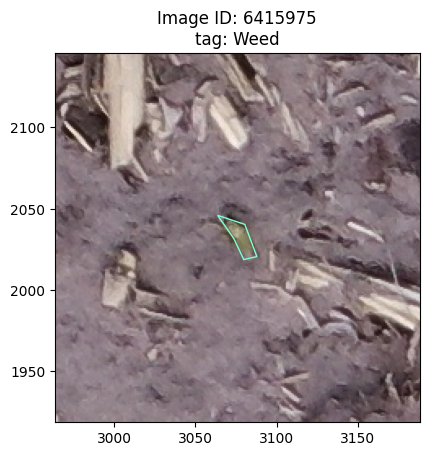

In [53]:
# DISPLAY A SINGLE DL POLYGON ON THE IMAGE

example_image_id = 6415975
im_path = env.download_image(int(example_image_id))
image = io.imread(im_path)

x_values = [coord['x'] for coord in polygon_coordinates[0]]
y_values = [coord['y'] for coord in polygon_coordinates[0]]


fig, ax = plt.subplots()
polygon = patches.Polygon(list(zip(x_values, y_values)), closed=True, fill=None, edgecolor='aquamarine')

ax.imshow(image)
# Add the polygon patch to the axes
ax.add_patch(polygon)

# Set the x and y limits of the axes
ax.set_xlim(min(x_values)-100, max(x_values)+100)
ax.set_ylim(min(y_values)-100, max(y_values)+100)

ax.set_title(f"Image ID: {example_image_id}\ntag: {data['annotations'][0]['label']}")

# Display the plot
plt.show()

In [ ]:
# DATALOOP INFORMATION FROM JSON

data['annotations'][0].keys()
polygon_coordinates = data['annotations'][0]['coordinates']
data['annotations'][0]['type'], data['annotations'][0]['label']

Zoom image id: 6415975
Wide image id: 6417707


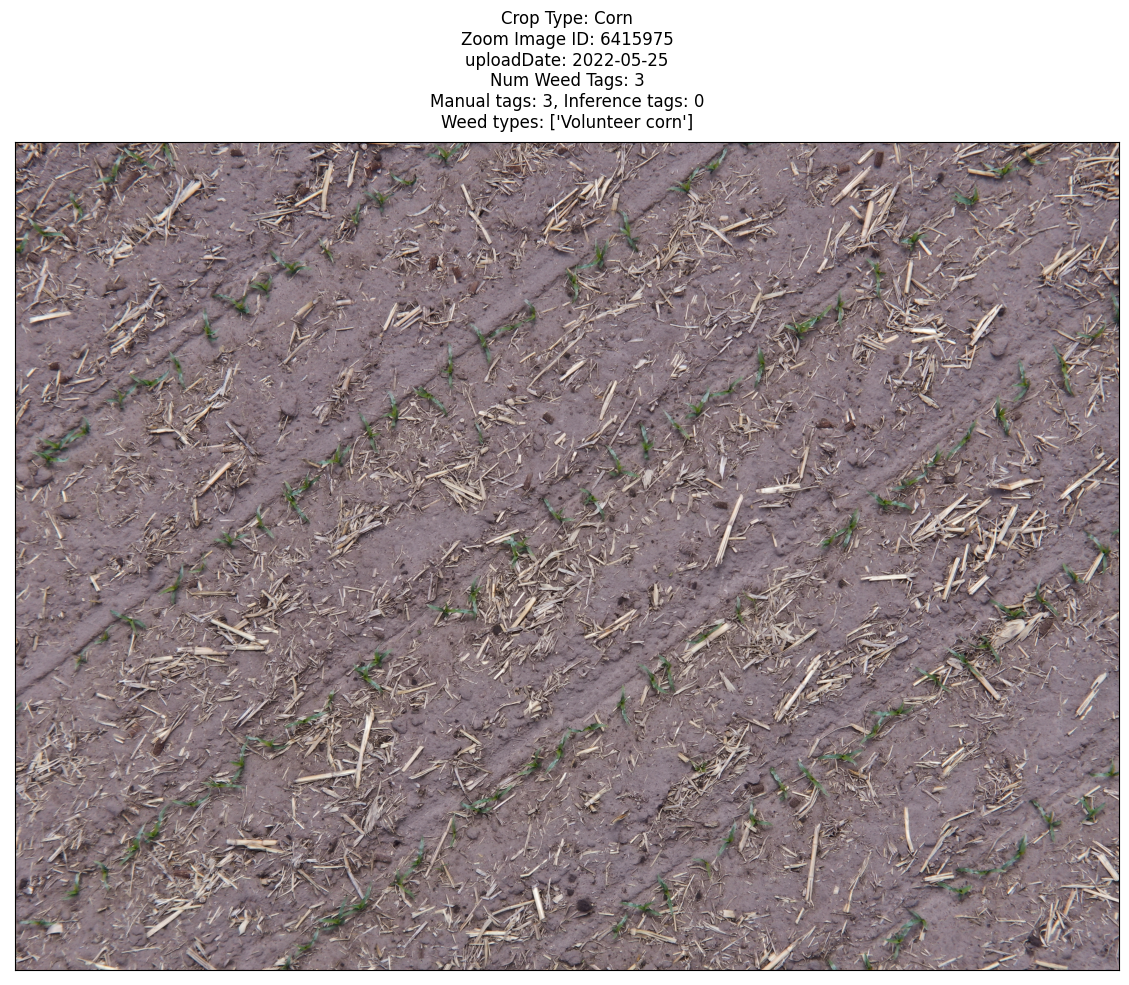

In [39]:
# READ AND DISPLAY IMAGE. ZOOM AND WIDE

example_image_id = 6415975
# SHOW IMAGES
weeds_images_df = pd.read_csv(os.path.join(DATA_DIR, "weeds_images_df_light.csv"))
print(f"Zoom image id: {example_image_id}")
image_data = weeds_images_df[weeds_images_df['imageID'] == example_image_id].reset_index(drop=True)
image_data['wideImageID'] = env.eti_api.get_matching_wide_images(list(image_data['imageID']))

image_data['uploadDate_time'] = image_data['uploadDate'].apply(datetime.fromtimestamp)
image_data['uploadDate_date'] = image_data['uploadDate_time'].apply(lambda x: x.to_pydatetime().date())
image_data['weed_types_ids'] = image_data['weed_types_ids_list'].apply(lambda x: x[0])
image_data['weed_inferenceTagsCount'] = image_data['weed_inferenceTagsCount'].apply(eval)
image_data['weed_inferenceTagsCount'] = image_data['weed_inferenceTagsCount'].apply(lambda x: x[0])
image_data['weed_manualTagsCount'] = image_data['num_weed_tags'] - image_data['weed_inferenceTagsCount']
matching_wide_image_id = int(image_data.at[0, 'wideImageID'])
print(f"Wide image id: {matching_wide_image_id}")
image_num_tags = image_data.at[0, 'num_weed_tags']
image_num_manual_tags = image_data.at[0, 'weed_manualTagsCount']
image_num_inference_tags = image_data.at[0, 'weed_inferenceTagsCount']

image_crop_name = image_data.at[0, 'cropName']
upload_date = image_data.at[0, 'uploadDate_date']
weed_types = image_data.at[0, 'weed_types_ids_list']
weed_types = eval(image_data.at[0, 'weed_types_ids_list'])
weed_types = list(map(cat_dict_names.get, weed_types))


im_path = env.download_image(int(example_image_id))
image = io.imread(im_path)

# wide_im_path = env.download_image(int(matching_wide_image_id))
# wide_image = io.imread(wide_im_path)

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.imshow(image, extent=[0, image.shape[1], 0, image.shape[0]])
# axes[1].imshow(wide_image, extent=[0, wide_image.shape[1], 0, wide_image.shape[0]])


axes.set_xticks([])
axes.set_yticks([])
fig.set_size_inches(20, 10)
plt.suptitle(f"Crop Type: {image_crop_name}\nZoom Image ID: {example_image_id}\nuploadDate: {upload_date}\nNum Weed Tags: {image_num_tags}\nManual tags: {image_num_manual_tags}, Inference tags: {image_num_inference_tags}\nWeed types: {weed_types}")
# plt.suptitle(f"Crop Type: {image_crop_name}\nZoom Image ID: {example_image_id}, Wide Image ID: {matching_wide_image_id}\nuploadDate: {upload_date}\nNum Weed Tags: {image_num_tags}\nManual tags: {image_num_manual_tags}, Inference tags: {image_num_inference_tags}\nWeed types: {weed_types}")

plt.tight_layout()
plt.show()

In [ ]:
json_path = "data/dataloop_jsons/6415975.json"
with open(json_path) as file:
    data = json.load(file)

polygon_coordinates = data['annotations'][0]['coordinates']

print(data.keys())